# Table of contents
1. Import libraries
2. Import data set(s)
3. Prep data
4. Apply elbow technique
5. Run k-means clustering
6. Export file(s)

# 1. Import libraries

In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [68]:
%matplotlib inline

# 2. Import data set(s)

In [69]:
# Define path
path = r'/Users/elisabetta/Documents/01-2023 Used Boats'

In [70]:
# Import cvs file
df_boats = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'boat_data_cleaned_3.csv'), index_col = False)

In [71]:
df_boats.head()

,boat_id,price,boat_type,manufacturer,type,year_built,length,length_cm,length_mm,width,width_cm,width_mm,material,location,num_views_last_7_days
0,7402,53754,Bowrider,Regal power boats,"new boat from stock,Unleaded",2021,6.00,600,6000,2.50,250,2500,GRP,Germany,131
1,7105,60753,Bowrider,Regal power boats,"new boat from stock,Unleaded",2021,6.10,610,6100,2.50,250,2500,GRP,Germany,69
2,7280,61079,Sport Boat,Regal power boats,"new boat from stock,Unleaded",2021,6.00,600,6000,2.50,250,2500,GRP,Switzerland,285
3,1147,61713,Bowrider,Regal power boats,"new boat from stock,Unleaded",2021,6.10,610,6100,2.50,250,2500,GRP,Germany,110
4,5798,123468,Sport Boat,Sessa power boats,"new boat from stock,Unleaded",2021,8.42,842,8420,2.64,264,2640,GRP,Switzerland,185


In [72]:
df_boats.shape

(2118, 15)

In [73]:
df_boats.dtypes

boat_id                    int64
price                      int64
boat_type                 object
manufacturer              object
type                      object
year_built                 int64
length                   float64
length_cm                  int64
length_mm                  int64
width                    float64
width_cm                   int64
width_mm                   int64
material                  object
location                  object
num_views_last_7_days      int64
dtype: object

In [74]:
# Create subset elbow and kmeans
subset = df_boats[['price', 'year_built', 'length_cm', 'num_views_last_7_days']]

In [75]:
# Check data types
subset.dtypes

price                    int64
year_built               int64
length_cm                int64
num_views_last_7_days    int64
dtype: object

# 4. Apply elbow technique

In [76]:
# Define range of potential clusters
num_cl = range(1, 10)

# Then define k-means clusters in the range assigned above
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [77]:
# Create score to represent rate of variation for given cluster option
score = [kmeans[i].fit(subset).score(subset) for i in range(len(kmeans))]

score

[-540061225239.59216,
 -218676370409.53595,
 -88166275306.69592,
 -48073506662.31869,
 -31799598805.20271,
 -24421018039.92505,
 -17597846657.499916,
 -13420882261.368654,
 -10133768778.264664]

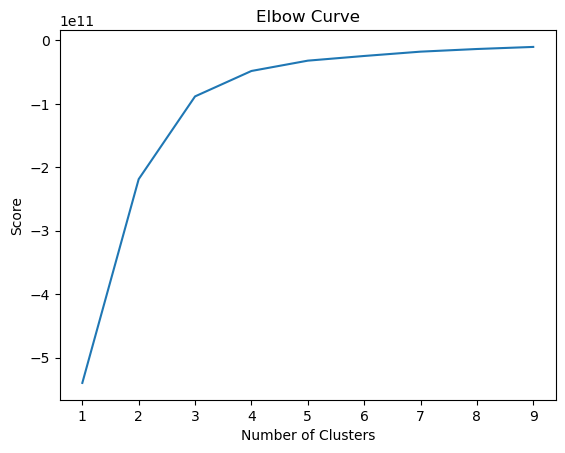

In [78]:
# Plot elbow curve using PyLab
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [79]:
# The elbow flattens out visibly after 4 on the x-axis. Therefore, that's the optimal numer of clusters (3)

# 5. Run k-means clustering

In [80]:
# Create the k-means object
kmeans = KMeans(n_clusters = 3)

In [81]:
# Fit the k-means object to the subset
kmeans.fit(subset)

KMeans(n_clusters=3)

In [82]:
# Check output
subset['clusters'] = kmeans.fit_predict(subset)

/var/folders/4s/rrmnbjhx4dn3t6nl5kp6m9rr0000gn/T/ipykernel_5764/587797150.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['clusters'] = kmeans.fit_predict(subset)


In [83]:
subset.head(10)

,price,year_built,length_cm,num_views_last_7_days,clusters
0,53754,2021,600,131,1
1,60753,2021,610,69,1
2,61079,2021,600,285,1
3,61713,2021,610,110,1
4,123468,2021,842,185,1
5,4499,2020,440,354,2
6,4600,2020,440,113,2
7,4799,2020,510,203,2
8,5200,2020,420,141,2
9,26700,2020,650,97,0


In [84]:
subset['clusters'].value_counts()

0    1239
2     469
1     410
Name: clusters, dtype: int64

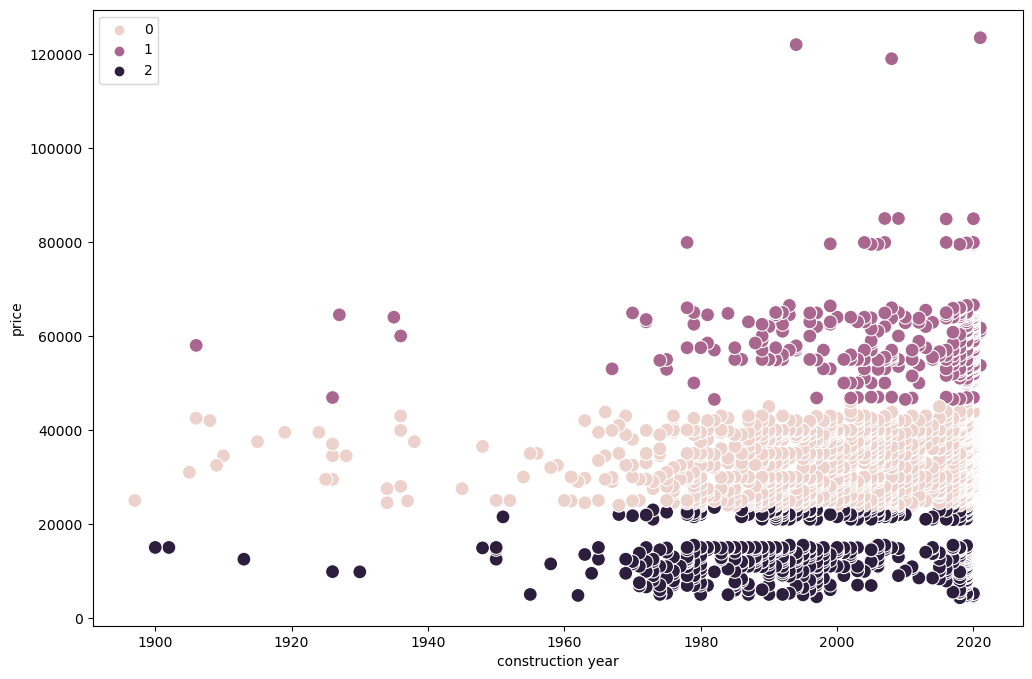

In [85]:
# Plot the clusters >>> price and construction year
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=subset['year_built'], y=subset['price'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('construction year')
plt.ylabel('price')
plt.savefig('scatter_price_year.png')
plt.show()

In [86]:
# Pink is the most populated cluster, with a concentration of boats produced after the 70s and costing approx. 23k to 43k EUR
# Black is the second most populated cluster and behaves similarly to Pink, although it has less very old boats
# Purple has much less boats overall, which are more spread out in terms of price than the other two clusters
# All three clusters have just a few boats produced before the 70s. Purple boats are mostly newer (produced after 2000)
# Overall weak trend indicating that the newer the boat is, the more expensive it gets

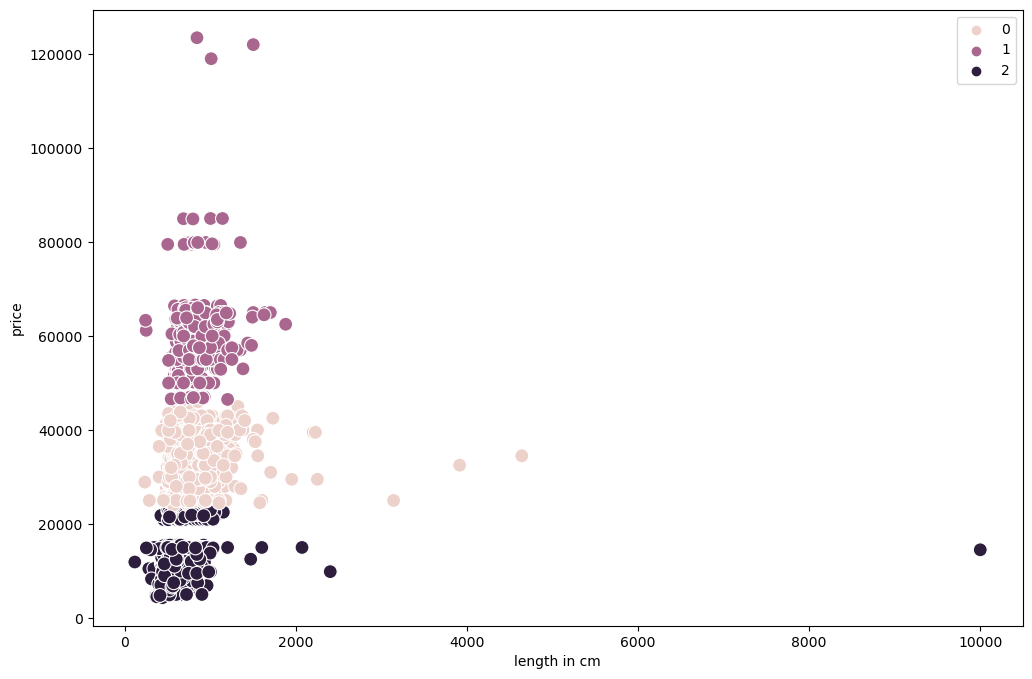

In [87]:
# Plot the clusters >>> price and length
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=subset['length_cm'], y=subset['price'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('length in cm')
plt.ylabel('price')
plt.savefig('scatter_price_length.png')
plt.show()

In [88]:
# Here we see that the newer, more expensive boats (purple), are not also longer (i.e. bigger) than the others
# Actually, the longest boats belong to the pink cluster, and there's one outlier belonging to the black group
# Length therefore, doesn't seem to influence price significantly

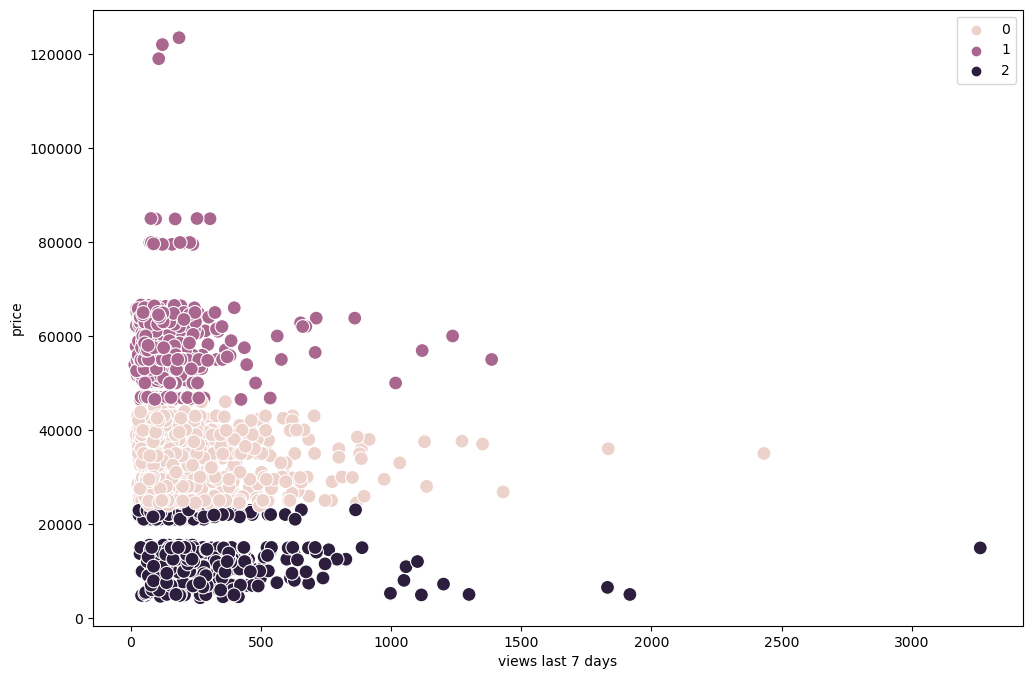

In [89]:
# Plot the clusters >>> price and views last 7 days
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=subset['num_views_last_7_days'], y=subset['price'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('views last 7 days')
plt.ylabel('price')
plt.savefig('scatter_price_views.png')
plt.show()

In [90]:
# The boats getting more views are the ones belonging to the low and average price ranges (black and pink)
# The number of views therefore doesn't seem to drive up prices, or probably even have a correlation with them
# It's more plausible to think that there's more people interested in cheaper boats

In [91]:
# Compare clusters side by side in tabular form

# First define cluster names
subset.loc[subset['clusters'] == 2, 'cluster'] = '2. black'
subset.loc[subset['clusters'] == 1, 'cluster'] = '1. purple'
subset.loc[subset['clusters'] == 0, 'cluster'] = '0. pink'

/var/folders/4s/rrmnbjhx4dn3t6nl5kp6m9rr0000gn/T/ipykernel_5764/3492428785.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset.loc[subset['clusters'] == 2, 'cluster'] = '2. black'


In [92]:
# Then group by stats
subset.groupby('cluster').agg({'price':['mean', 'median'], 
                         'year_built':['mean', 'median'], 
                         'length_cm':['mean', 'median'], 
                         'num_views_last_7_days':['mean', 'median'],})

price            year_built           length_cm         \
                   mean   median         mean  median        mean median   
cluster                                                                    
0. pink    33699.563358  34000.0  2002.063761  2005.0  782.931396  744.0   
1. purple  59048.326829  57017.5  2010.165854  2018.0  814.751220  770.0   
2. black   13630.886994  12990.0  1995.526652  1995.0  665.409382  615.0   

          num_views_last_7_days         
                           mean median  
cluster                                 
0. pink              187.013721  135.0  
1. purple            147.958537  106.0  
2. black             259.147122  190.0

In [93]:
# Comment & conclusions
# The black cluster is the cheapest (avg. price 13.6k EUR) but also includes, on average, the oldest boats (avg. construction year 1995)
# The purple cluster includes much more expensive boats than the other two clustes (avg. price 59k EUR) and also the newest (avg. construction year 2018)
# The pink cluster has slightly older boats than purple (avg. construction year 2005) but strongly lower prices (avg. price 33.6k EUR)
# Length doesn't seem to play a role in determining the price of a boat, with all three clusters having similar mean and median values
# It looks like that the boats with most views are the least expensive, suggesting no correlation here, i.e. cheaper boats are more appealing to the audience of this website

# 6. Export file(s)

In [94]:
# Attach column "cluster" to main data frame df_boats
df_merged = pd.merge(df_boats, subset,  how='left', left_on=['price','year_built','length_cm','num_views_last_7_days'], right_on = ['price','year_built','length_cm','num_views_last_7_days'])

In [95]:
df_merged.head()

,boat_id,price,boat_type,manufacturer,type,year_built,length,length_cm,length_mm,width,width_cm,width_mm,material,location,num_views_last_7_days,clusters,cluster
0,7402,53754,Bowrider,Regal power boats,"new boat from stock,Unleaded",2021,6.00,600,6000,2.50,250,2500,GRP,Germany,131,1,1. purple
1,7105,60753,Bowrider,Regal power boats,"new boat from stock,Unleaded",2021,6.10,610,6100,2.50,250,2500,GRP,Germany,69,1,1. purple
2,7280,61079,Sport Boat,Regal power boats,"new boat from stock,Unleaded",2021,6.00,600,6000,2.50,250,2500,GRP,Switzerland,285,1,1. purple
3,1147,61713,Bowrider,Regal power boats,"new boat from stock,Unleaded",2021,6.10,610,6100,2.50,250,2500,GRP,Germany,110,1,1. purple
4,5798,123468,Sport Boat,Sessa power boats,"new boat from stock,Unleaded",2021,8.42,842,8420,2.64,264,2640,GRP,Switzerland,185,1,1. purple


In [96]:
# Check cluster columns
df_merged['cluster'].value_counts(dropna = False)

0. pink      1239
2. black      469
1. purple     410
Name: cluster, dtype: int64

In [97]:
df_merged['clusters'].value_counts(dropna = False)

0    1239
2     469
1     410
Name: clusters, dtype: int64

In [98]:
# Rename columns
df_merged.rename(columns = {'clusters' : 'cluster_num', 'cluster': 'cluster_col'}, inplace = True)

In [99]:
# check output
df_merged.head()

,boat_id,price,boat_type,manufacturer,type,year_built,length,length_cm,length_mm,width,width_cm,width_mm,material,location,num_views_last_7_days,cluster_num,cluster_col
0,7402,53754,Bowrider,Regal power boats,"new boat from stock,Unleaded",2021,6.00,600,6000,2.50,250,2500,GRP,Germany,131,1,1. purple
1,7105,60753,Bowrider,Regal power boats,"new boat from stock,Unleaded",2021,6.10,610,6100,2.50,250,2500,GRP,Germany,69,1,1. purple
2,7280,61079,Sport Boat,Regal power boats,"new boat from stock,Unleaded",2021,6.00,600,6000,2.50,250,2500,GRP,Switzerland,285,1,1. purple
3,1147,61713,Bowrider,Regal power boats,"new boat from stock,Unleaded",2021,6.10,610,6100,2.50,250,2500,GRP,Germany,110,1,1. purple
4,5798,123468,Sport Boat,Sessa power boats,"new boat from stock,Unleaded",2021,8.42,842,8420,2.64,264,2640,GRP,Switzerland,185,1,1. purple


In [100]:
df_merged.shape

(2118, 17)

In [101]:
# Export data to csv
df_merged.to_csv(os.path.join(path, '02 Data','Prepared Data', 'boat_data_cleaned_4.csv'))